In [2]:
import pandas as pd
import numpy as np

In [3]:
from recommend.utils import PROJ_ROOT

PROJ_ROOT

PosixPath('/home/petra/Data/KTP/MUNI/mgr_FI/2_semestr/PV254-Recommender-Systems/csfd-movie-recommender')

In [4]:
f"{PROJ_ROOT}/data/movies.pkl"

'/home/petra/Data/KTP/MUNI/mgr_FI/2_semestr/PV254-Recommender-Systems/csfd-movie-recommender/data/movies.pkl'

In [5]:
movies = pd.read_pickle(f"{PROJ_ROOT}/data/movies.pkl")

In [5]:
movies.head()

,title,description,kind,genres,countries,year,length,poster,foreign_titles,creators
movie_id,,,,,,,,,,
230421-houbicky,Houbičky,"Partička amerických teenagerů, která si vyrazi...",movie,"[Horor, Thriller]","[Irsko, Velká Británie, Dánsko]",2007,84 min,//image.pmgstatic.com/cache/resized/w420/files...,{'Irsko': 'Shrooms'},"{'Režie': [('/tvurce/4690-paddy-breathnach/', ..."
10789-prvni-liga,První liga,V nejvyšší lize získávají hráči baseballu boha...,movie,"[Komedie, Sportovní]",[USA],1989,107 min,//image.pmgstatic.com/cache/resized/w420/files...,"{'USA': 'Major League', 'Slovensko': 'Prvá liga'}","{'Režie': [('/tvurce/4010-david-s-ward/', 'Dav..."
235032-yes-man,Yes Man,"Carl Allen je zatrpklý bankovní úředník, který...",movie,"[Komedie, Romantický]",[USA],2008,100 min,//image.pmgstatic.com/files/images/film/poster...,"{'Austrálie': 'Yes Man', 'Kanada': 'Yes Man', ...","{'Režie': [('/tvurce/8883-peyton-reed/', 'Peyt..."
234754-chlapec-v-pruhovanem-pyzamu,Chlapec v pruhovaném pyžamu,Osmiletý Bruno žije se svojí rodinou v Berlíně...,movie,"[Drama, Válečný]","[Velká Británie, USA]",2008,94 min,//image.pmgstatic.com/files/images/film/poster...,"{'USA': 'The Boy in the Striped Pajamas', 'ang...","{'Režie': [('/tvurce/6600-mark-herman/', 'Mark..."
301717-nejvetsi-showman,Největší showman,Hugh Jackman vévodí hvězdnému obsazení odvážné...,movie,"[Muzikál, Životopisný, Drama]",[USA],2017,105 min,//image.pmgstatic.com/cache/resized/w420/files...,"{'USA': 'The Greatest Showman', 'Slovensko': '...","{'Režie': [('/tvurce/78497-michael-gracey/', '..."


In [6]:
ratings = pd.read_pickle(f"{PROJ_ROOT}/data/ratings.pkl")

In [7]:
ratings.head()

,username,movie_id,stars,date,comment
0,kinghome,230421-houbicky,5.0,2011-11-13,Hodnocení některých šašků tady opravdu necháp...
1,SimonShot,230421-houbicky,5.0,2012-12-19,Tento snímek je zajímavý už jenom tím že se n...
2,blackend,230421-houbicky,5.0,2010-09-04,Pohoda a vzhledem k dobré atmosféře a nízkému...
3,LCH,230421-houbicky,5.0,2013-03-01,No na mě tento film zanechal dobrej dojem.......
4,knoxville,230421-houbicky,5.0,2008-01-16,MUSHIEEE!!! Horory teda nemusim ale tento sa ...


In [ ]:
# for content based approach - table movies
# for collaborative based approach - table ratings

Text(0, 0.5, 'frequency')

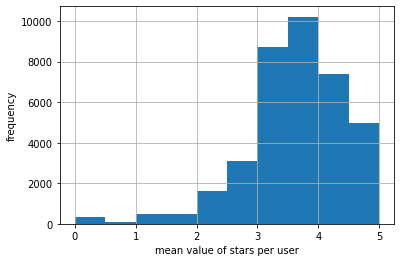

In [64]:
ax = ratings.groupby("username").stars.mean().hist()
ax.set_xlabel("mean value of stars per user")
ax.set_ylabel("frequency")

Text(0, 0.5, 'frequency')

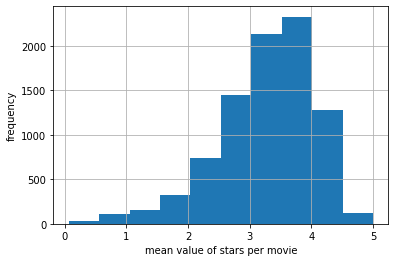

In [66]:
ax = ratings.groupby("movie_id").stars.mean().hist()
ax.set_xlabel("mean value of stars per movie")
ax.set_ylabel("frequency")

In [ ]:
# username.count() ---> size()

Text(0, 0.5, 'frequency')

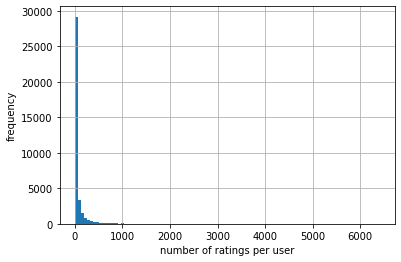

In [35]:
ax = ratings.groupby("username").size().hist(bins=100)
ax.set_xlabel("number of ratings per user")
ax.set_ylabel("frequency")

Text(0, 0.5, 'log frequency')

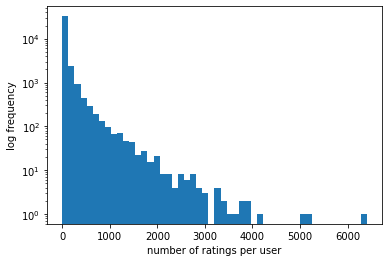

In [36]:
ax = ratings.groupby("username").size().plot(kind="hist", logy=True, bins=50)
ax.set_xlabel("number of ratings per user")
ax.set_ylabel("log frequency")

Text(0, 0.5, 'frequency')

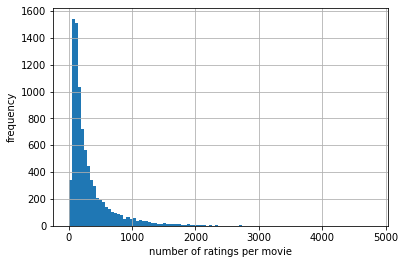

In [37]:
ax = ratings.groupby("movie_id").size().hist(bins=100)
ax.set_xlabel("number of ratings per movie")
ax.set_ylabel("frequency")

Text(0, 0.5, 'log frequency')

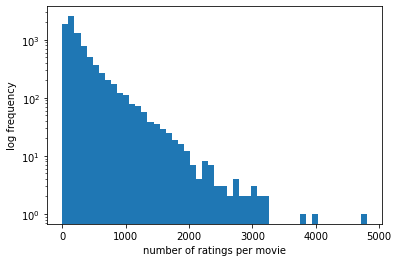

In [34]:
ax = ratings.groupby("movie_id").size().plot(kind="hist", logy=True, bins=50)
ax.set_xlabel("number of ratings per movie")
ax.set_ylabel("log frequency")

In [7]:
# users_stars = ratings.groupby("username").agg({"stars": [np.mean, np.size]})
users_stars = ratings.groupby("username").agg(avg_rating=("stars", "mean"), num_ratings=("stars", "size"))
users_stars

,avg_rating,num_ratings
username,,
!!Gus!!,3.538462,13
!Borec!,3.380000,100
!Malak-11!,3.782609,69
!t@ch1,0.000000,1
#47,3.204420,182
...,...,...
želvis,3.125000,16
žerbaski,1.000000,10
žlutaopoce,4.250000,4


Text(0, 0.5, 'number of ratings per user')

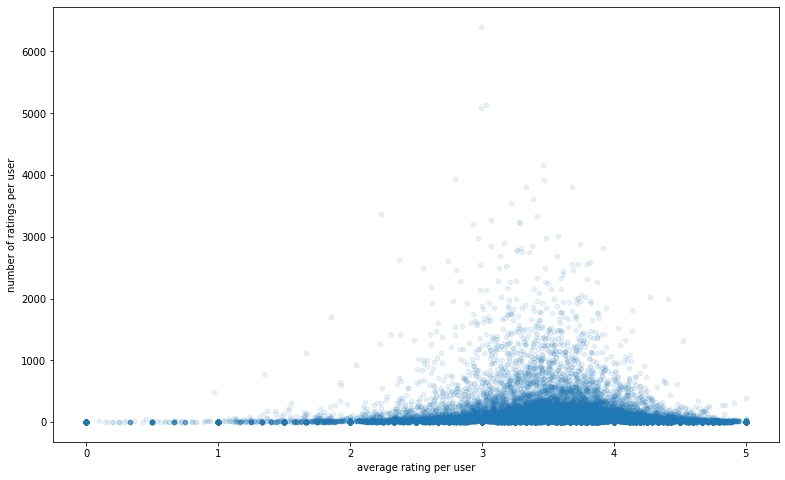

In [62]:
ax = users_stars.plot.scatter(x="avg_rating", y="num_ratings", alpha=0.1, figsize=(13,8))
ax.set_xlabel("average rating per user")
ax.set_ylabel("number of ratings per user")

Text(0, 0.5, 'log number of ratings per user')

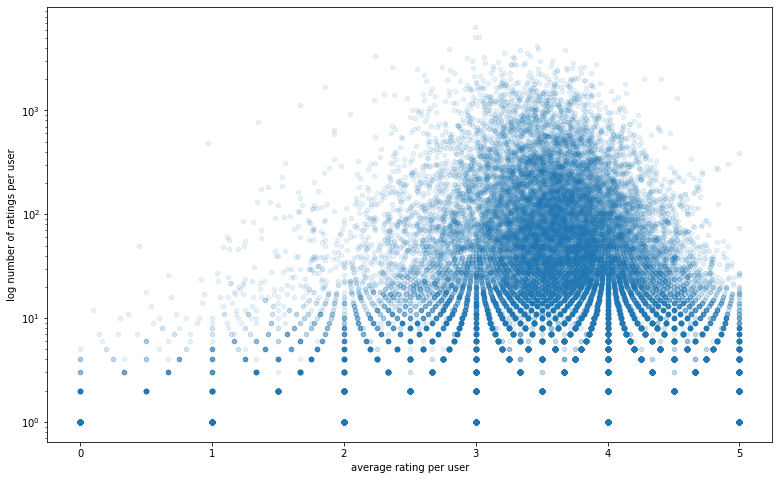

In [70]:
ax = users_stars.plot.scatter(x="avg_rating", y="num_ratings", alpha=0.1, figsize=(13,8), logy=True)
ax.set_xlabel("average rating per user")
ax.set_ylabel("log number of ratings per user")

In [8]:
movies_stars = ratings.groupby("movie_id").agg(avg_rating=("stars", "mean"), num_ratings=("stars", "size"))
movies_stars

,avg_rating,num_ratings
movie_id,,
100418-osud-cloveka,4.102273,88
10051-skola-hada,3.866667,106
10064-mistruv-syn,4.163717,227
10068-dentista,2.796117,103
10080-knoflikari,3.956743,394
...,...,...
99087-jdi-a-divej-se,4.187500,422
9910-jak-ukrast-venusi,4.272727,253
9926-prazdniny-v-rime,4.557814,789


In [23]:
sorted(movies_stars.num_ratings, reverse=True)[:10]

[4803, 4015, 3774, 3182, 3172, 3133, 3126, 3027, 3020, 3010]

In [26]:
movies_stars[movies_stars["num_ratings"] == 3774]

,avg_rating,num_ratings
movie_id,,
223734-temny-rytir,4.559151,3774


Text(0, 0.5, 'number of ratings per movie')

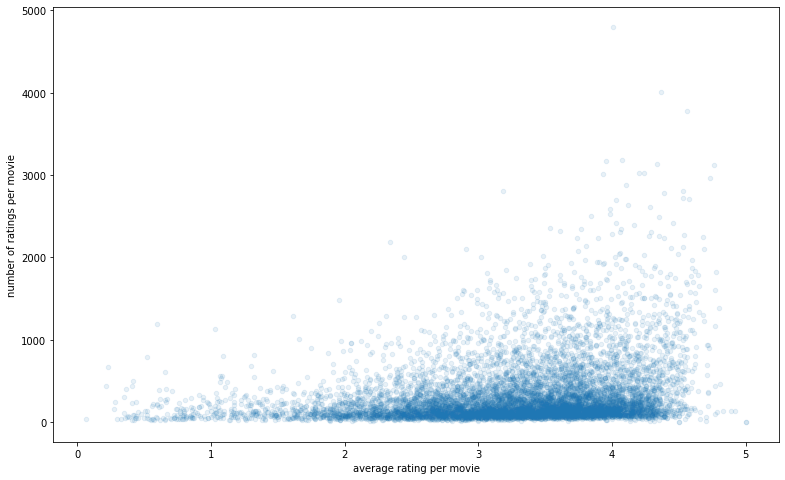

In [63]:
ax = movies_stars.plot.scatter(x="avg_rating", y="num_ratings", alpha=0.1, figsize=(13,8))
ax.set_xlabel("average rating per movie")
ax.set_ylabel("number of ratings per movie")

Text(0, 0.5, 'number of ratings per movie')

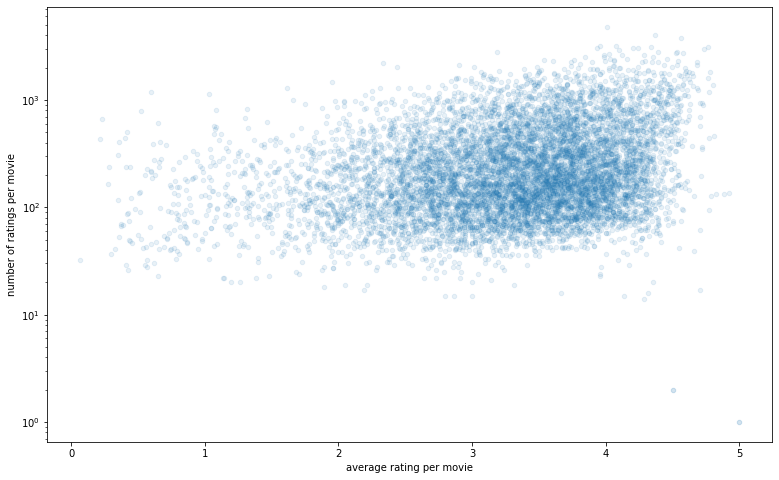

In [71]:
ax = movies_stars.plot.scatter(x="avg_rating", y="num_ratings", alpha=0.1, figsize=(13,8), logy=True)
ax.set_xlabel("average rating per movie")
ax.set_ylabel("number of ratings per movie")